# Pyfilaments exploratory data analysis notebook

In [168]:
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

In [327]:
# Load data

# bond length = 2.1
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_3.75_k_15_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'


# bond length = 4
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_15.0_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_20.0_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_25.0_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# k = 65
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-09/SimResults_Np_32_Shape_line_kappa_hat_16.25_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# k = 75
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-09/SimResults_Np_32_Shape_line_kappa_hat_18.75_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'

# Irrational number for spring constant:
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_17_k_69_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_18_k_72_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'

# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'


# Long dataset (750 cycles)
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-11/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
folder, *rest = os.path.split(file)

print(folder)

filament = analysis.analysisTools(file = file)

file_path = filament.analysis_folder




/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
3
Loading Simulation data from disk ...
Time step: 9.99990000099999
No:of particles : 32
No:of time points : 100001
Root path:  /home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_00.hdf5


In [4]:
# Calculate the filament length vs time

filament.compute_arc_length()

<IPython.core.display.Javascript object>


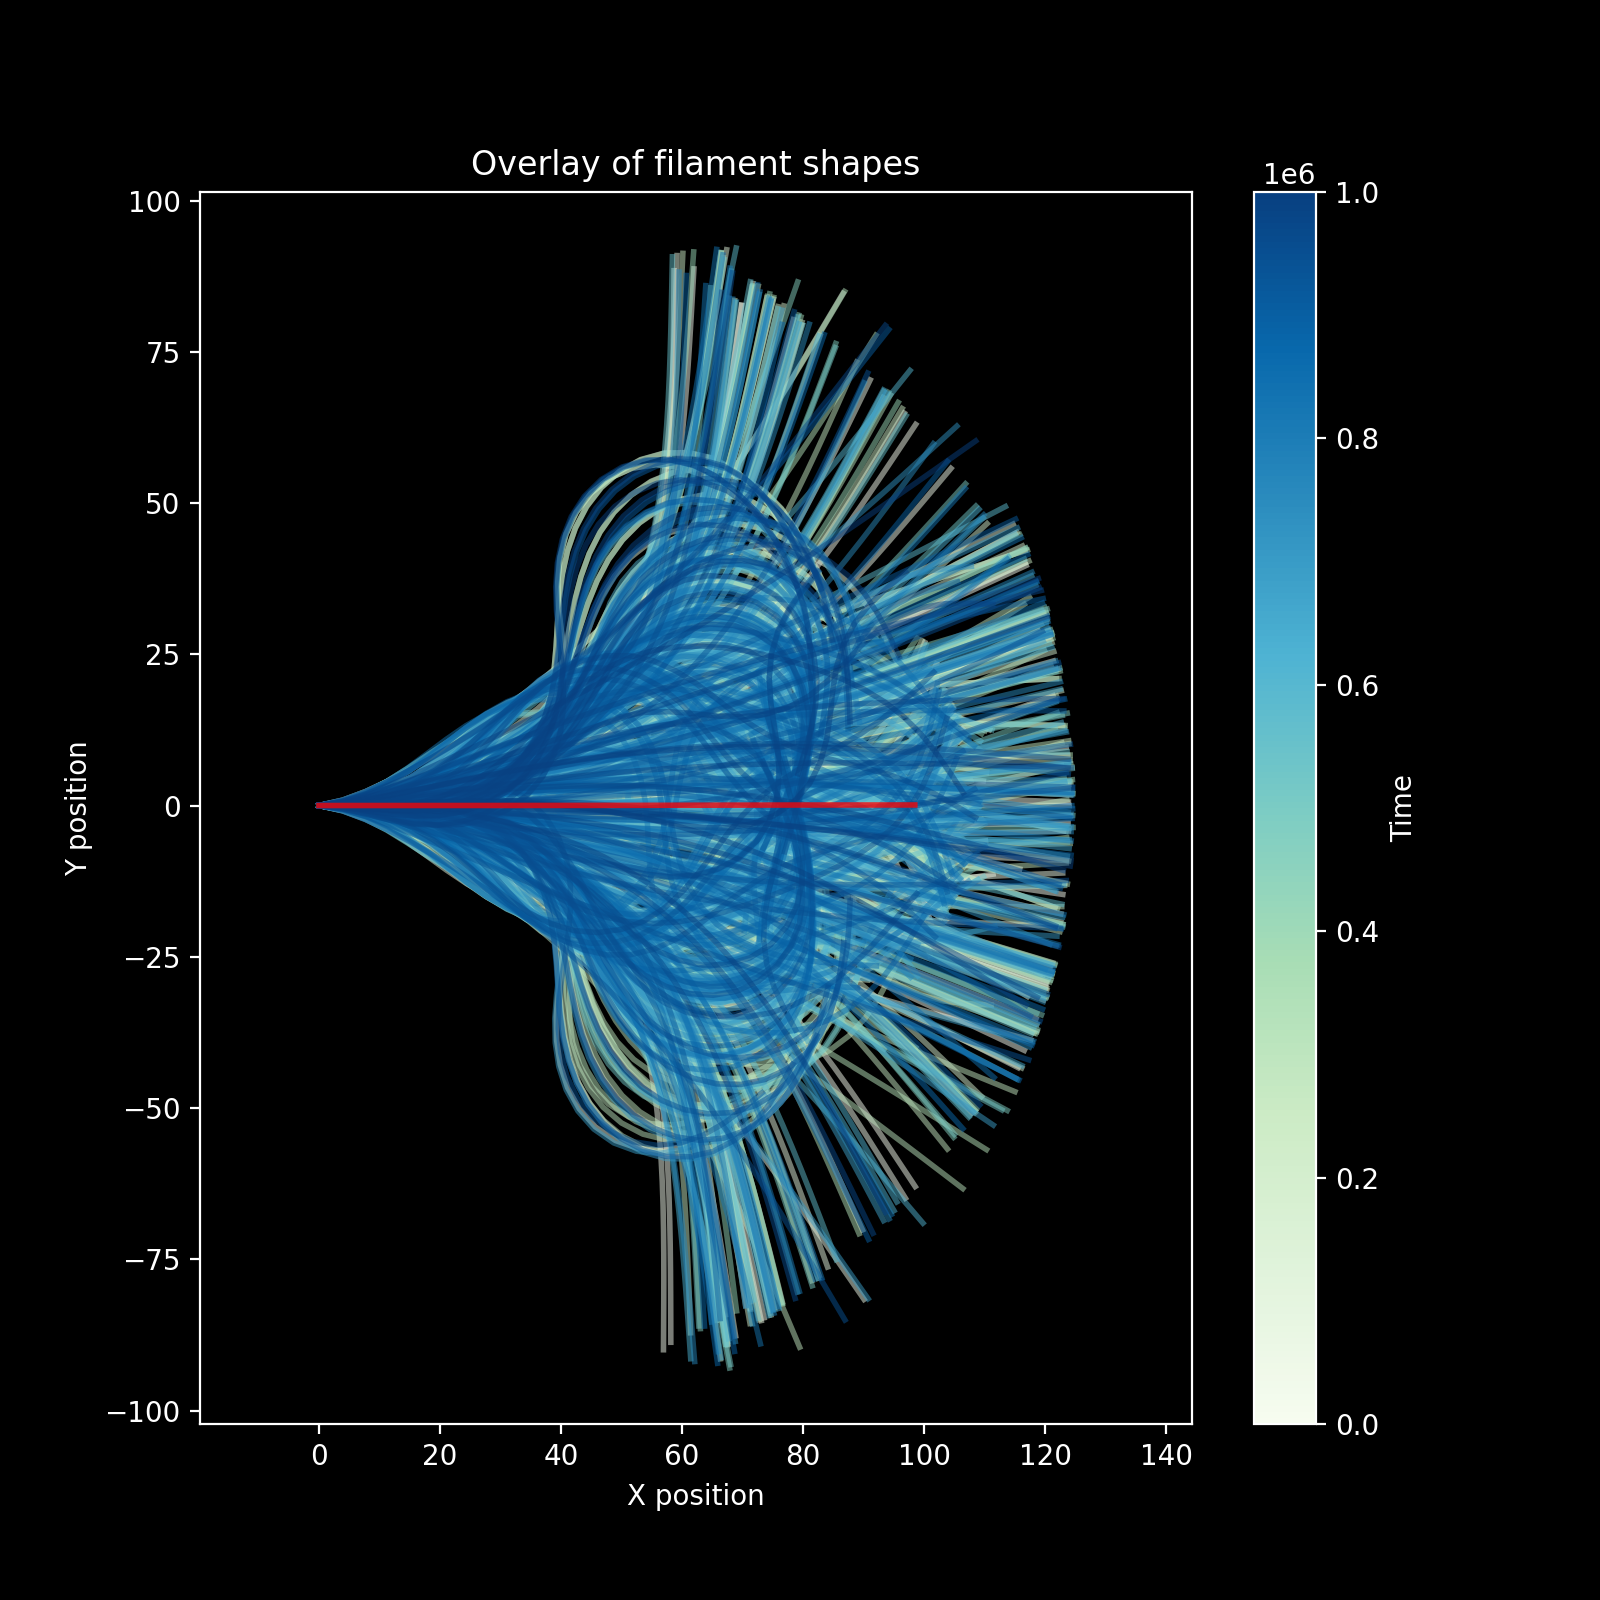

In [328]:
# Overlay of filament shapes
plt.style.use('dark_background')
filament.plot_filament_centerlines(stride = 100, save = True, color_by = 'Time')

# Tip search-coverage and unique locations sampled


Total unique positions sampled by tip: 390.0
Total hits : 37501


<IPython.core.display.Javascript object>


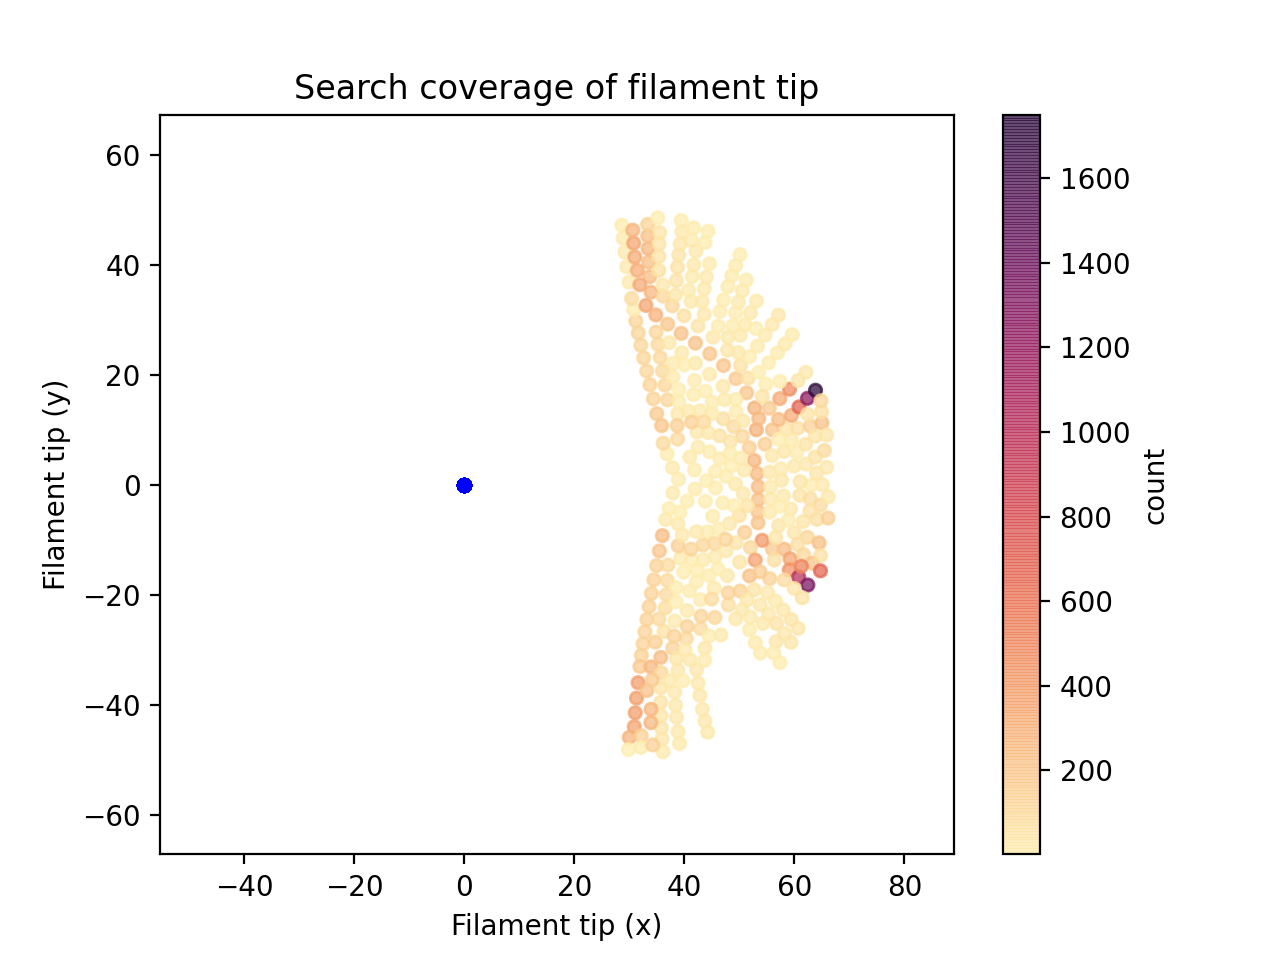

1


<IPython.core.display.Javascript object>


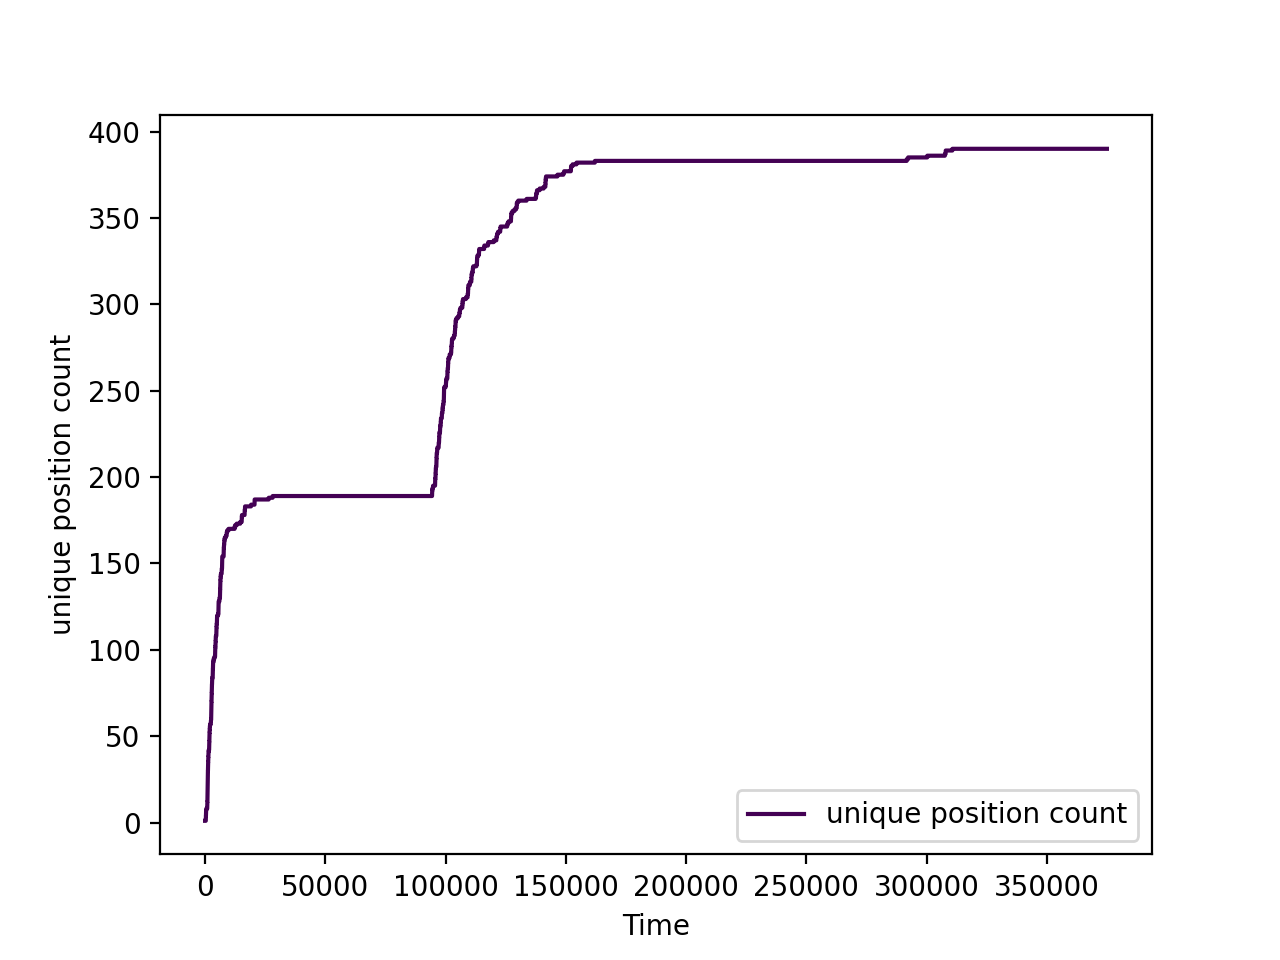

In [300]:
filament.filament_tip_coverage(save = True)
plt.style.use('default')
filament.plot_unique_tip_locations(save = True)
filament.plot_timeseries(var = ['unique position count'], save = True)

# Unique positions sampled (prelim results)

- k = 30, Total unique positions sampled by tip: 257.0
- k = 40, Total unique positions sampled by tip: 211.0
- k = 50, Total unique positions sampled by tip: 436.0
- k = 70, Total unique positions sampled by tip: 1423.0
- k = 100, Total unique positions sampled by tip: 460.0

# Tangent angle representation
We compute the coordinate-free tangent angle representation of the filament shape.

<IPython.core.display.Javascript object>


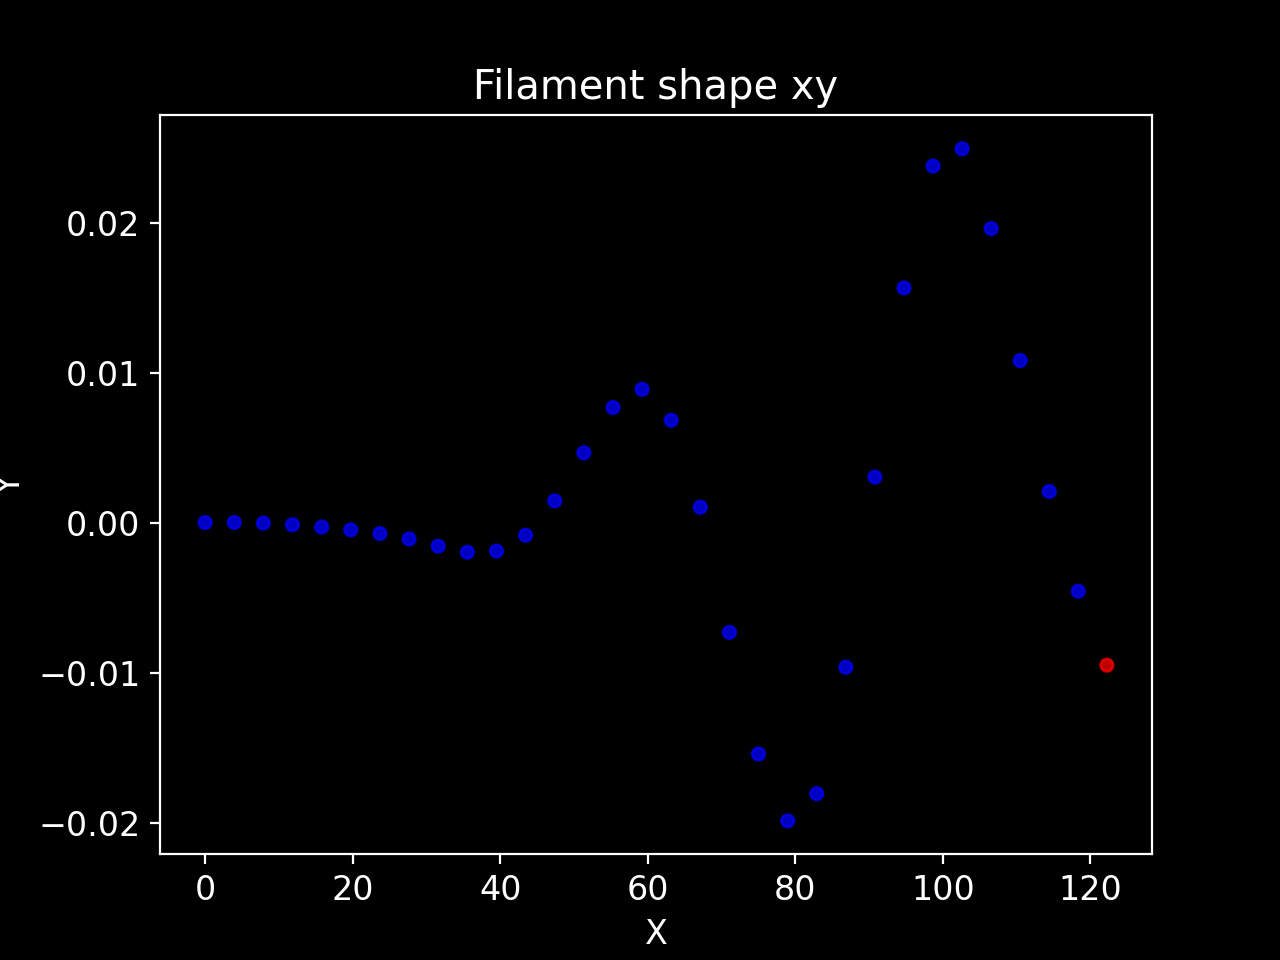

<IPython.core.display.Javascript object>


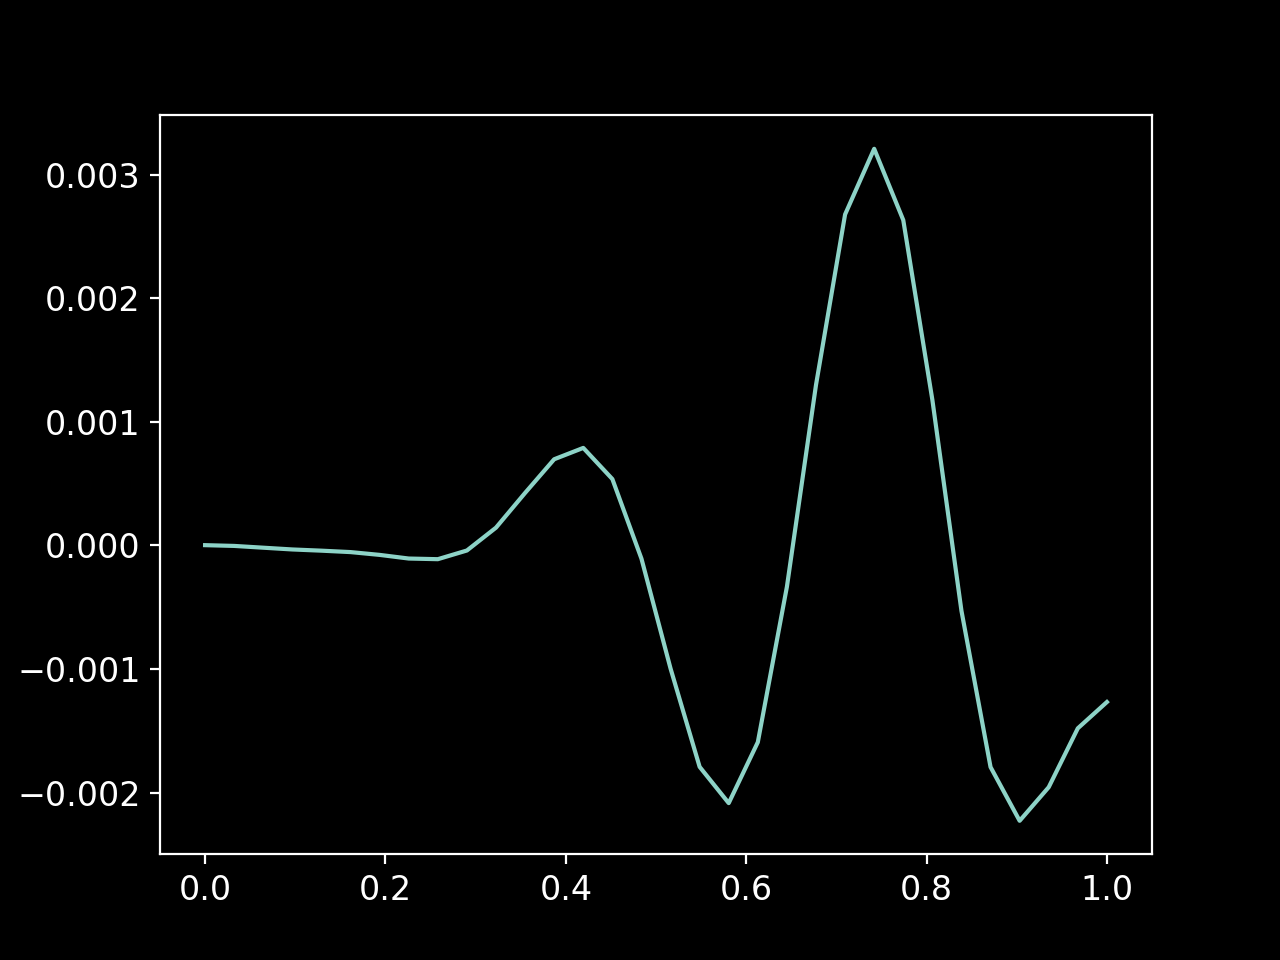

In [126]:
filament.r = filament.R[20, :]
filament.get_separation_vectors()
tangent_angles = filament.compute_tangent_angles()
arc_length_coordinate = np.linspace(0,1, filament.Np)


filament.plotFilament(r = filament.r)

plt.figure()
plt.plot(arc_length_coordinate, tangent_angles)
plt.show()

In [329]:
# Compute the tangent angle matrix
filament.compute_tangent_angle_matrix()

0
37500


<IPython.core.display.Javascript object>


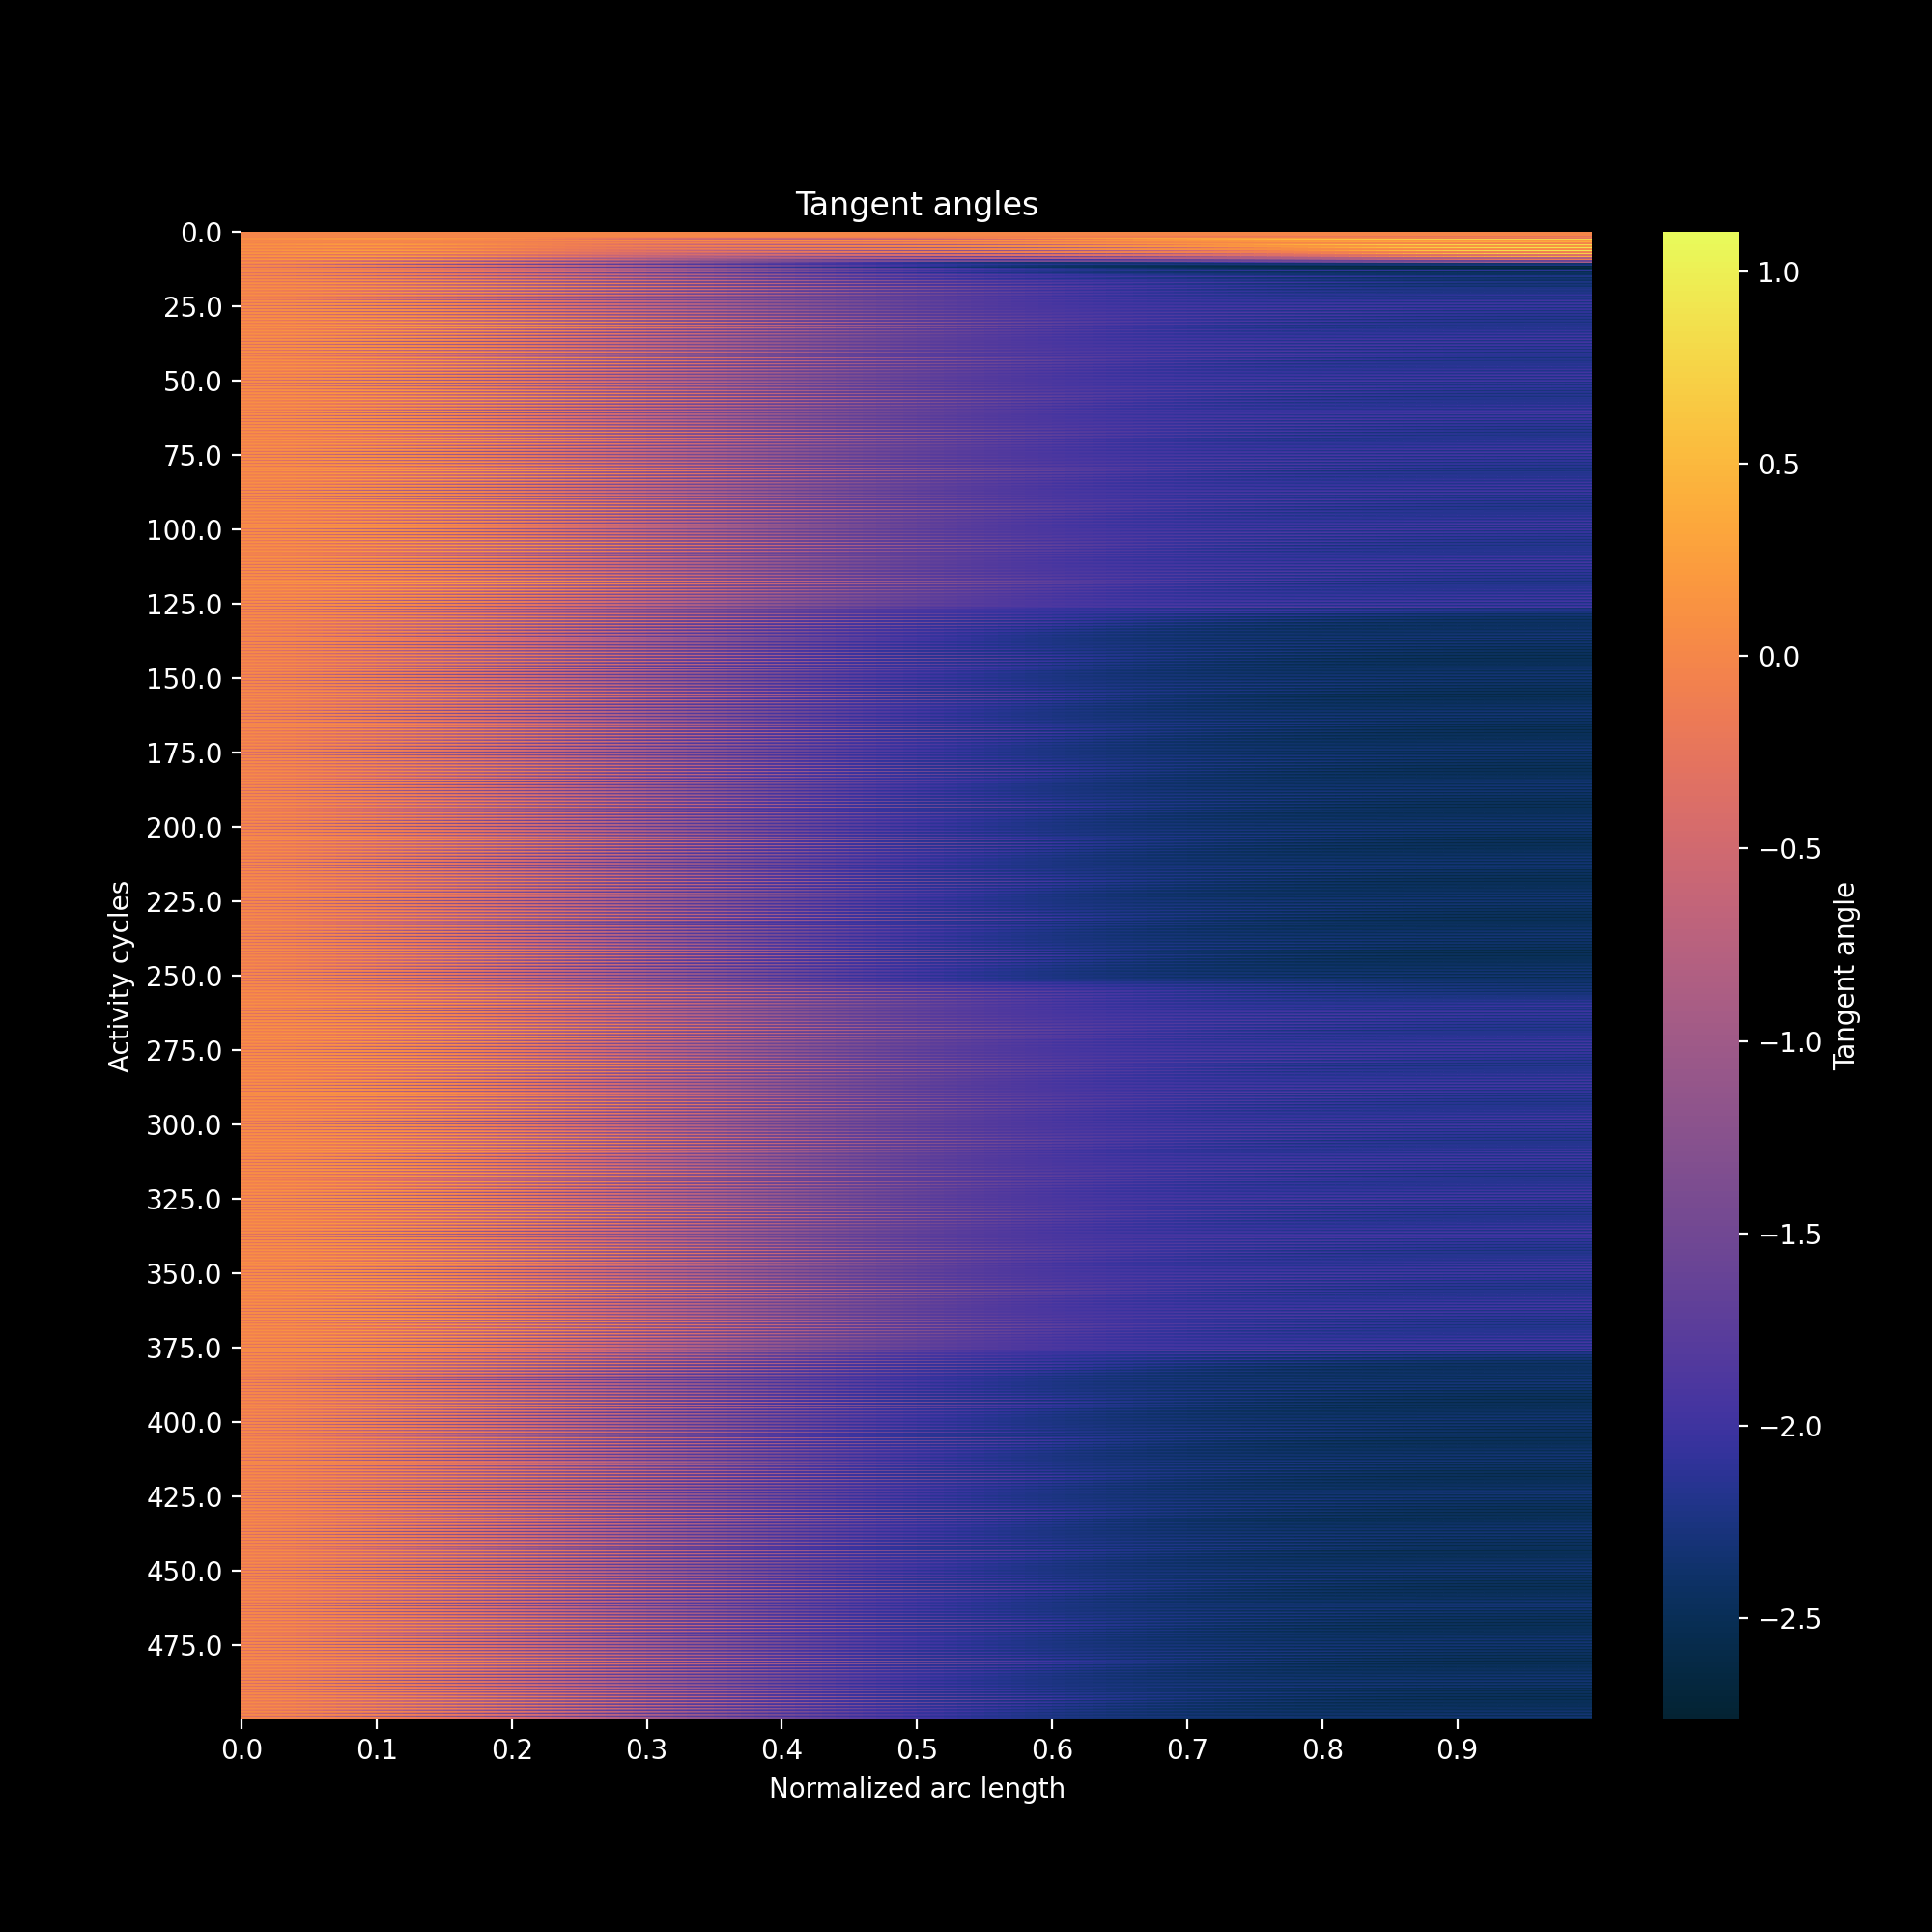

0
3750


<IPython.core.display.Javascript object>


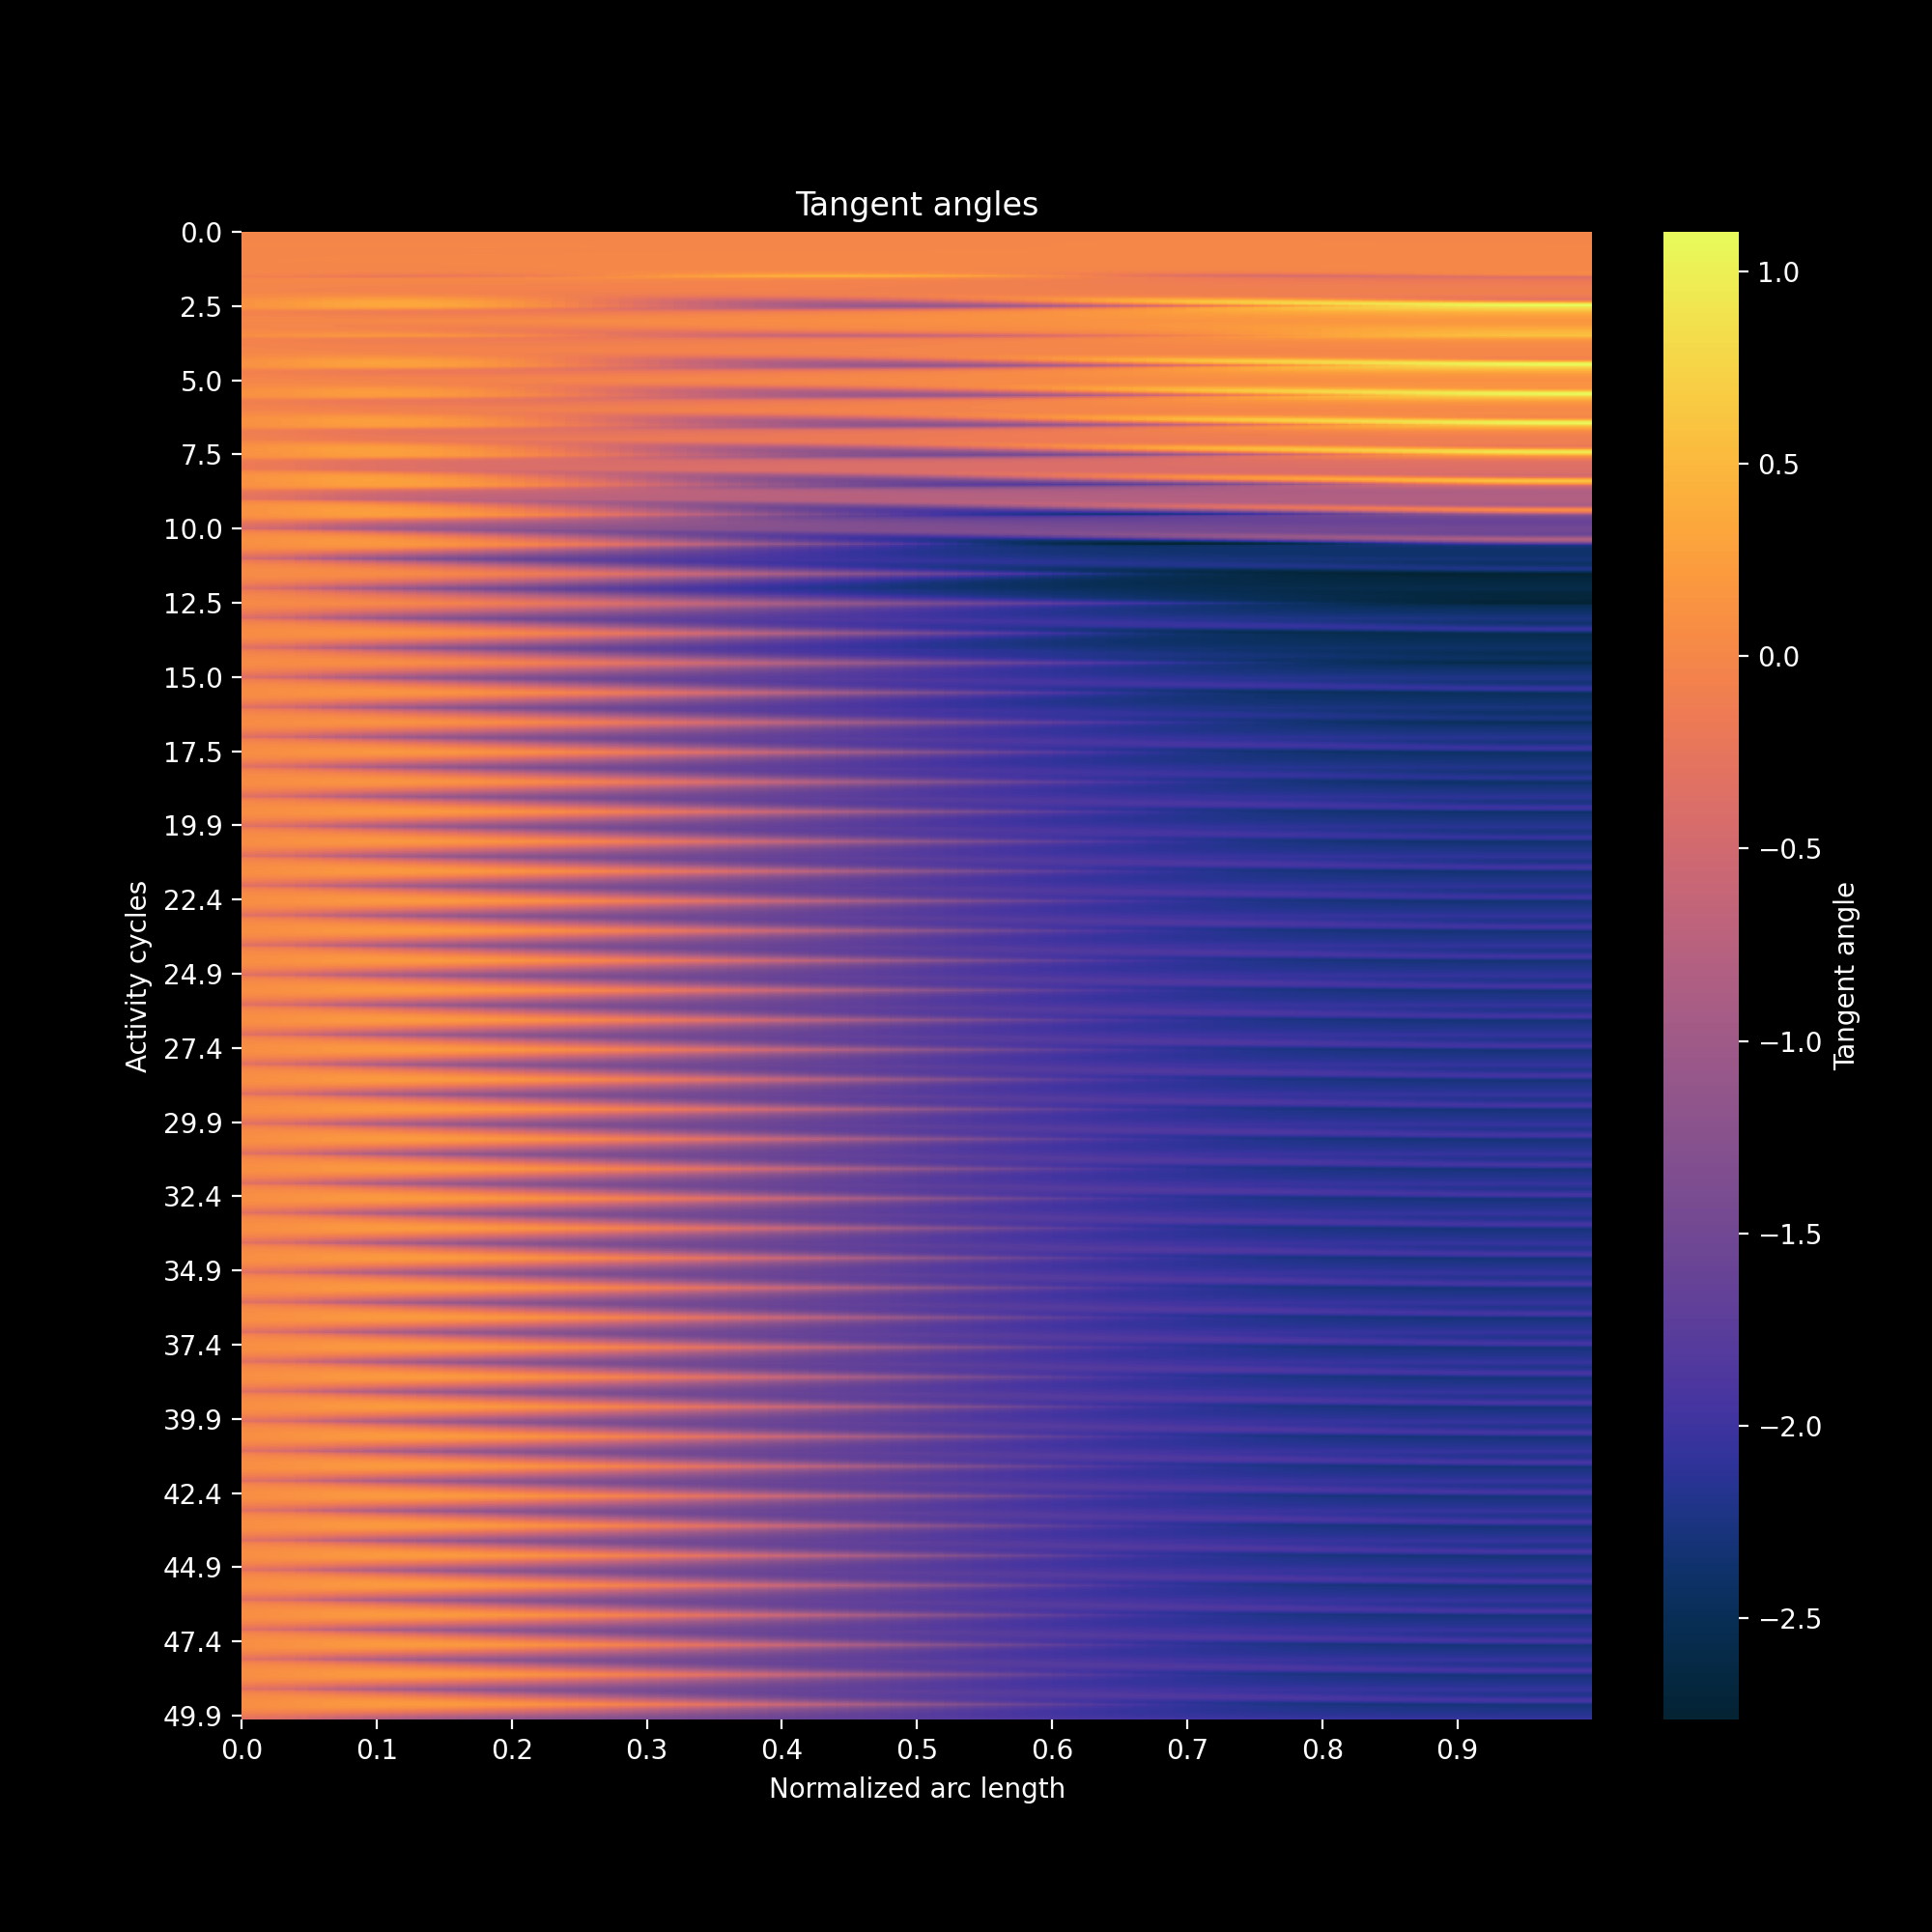

In [314]:
Tf = np.max(filament.Time)
plt.style.use('dark_background')
# Plot the tangent angle matrix
filament.plot_tangent_angle_matrix(save = True, start_time = 0, end_time = Tf)
filament.plot_tangent_angle_matrix(save = True, start_time = 0, end_time = 50*filament.activity_timescale )

## Tangent angle dynamics of the filament tip

<IPython.core.display.Javascript object>


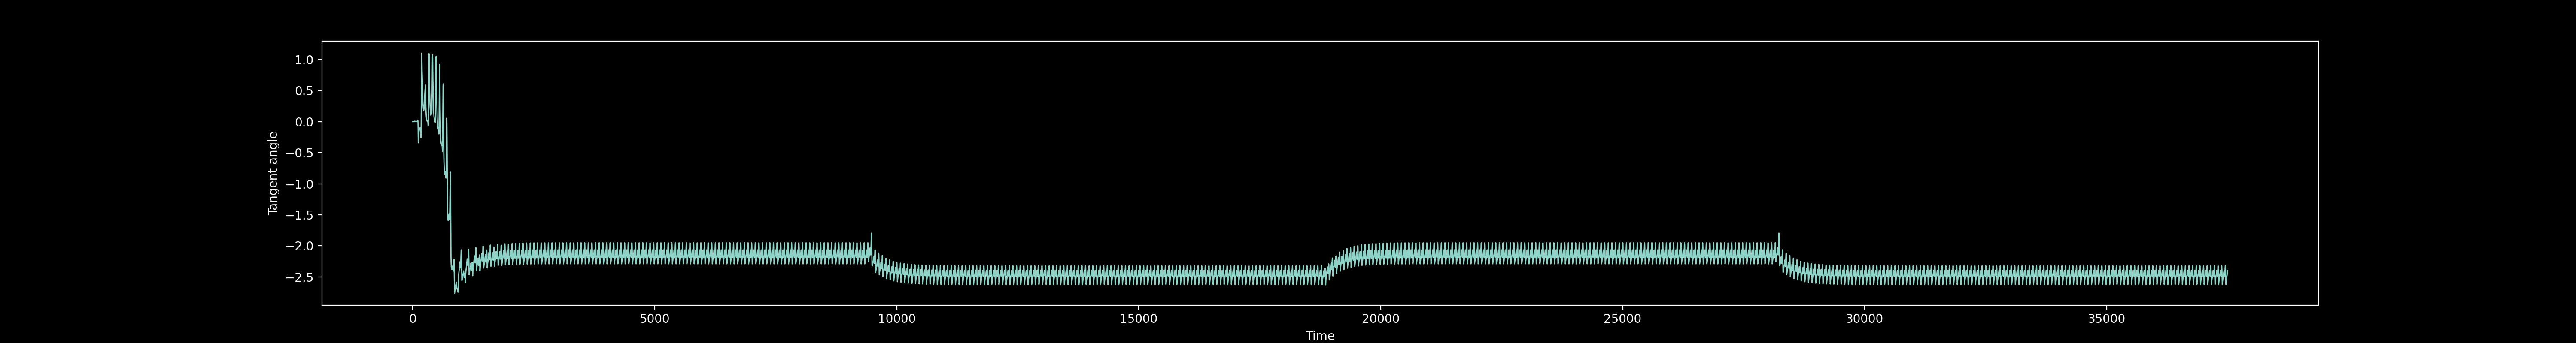

In [315]:
# Plot the tangent angle of the filament tip over time
time_array = range(int(filament.Nt))
plt.figure(figsize = (30,4))
plt.plot(filament.tangent_angles_matrix[:, -1], linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Tangent angle')
ax = plt.gca()
# ax.set_aspect(1)
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'TangentAngle_At_Tip.png'), dpi = 300)
plt.show()

# Shape covariance and PCA

No:of spatial points: 100
No:of time points: 100001
(100001, 100)
(100001, 100)


<IPython.core.display.Javascript object>


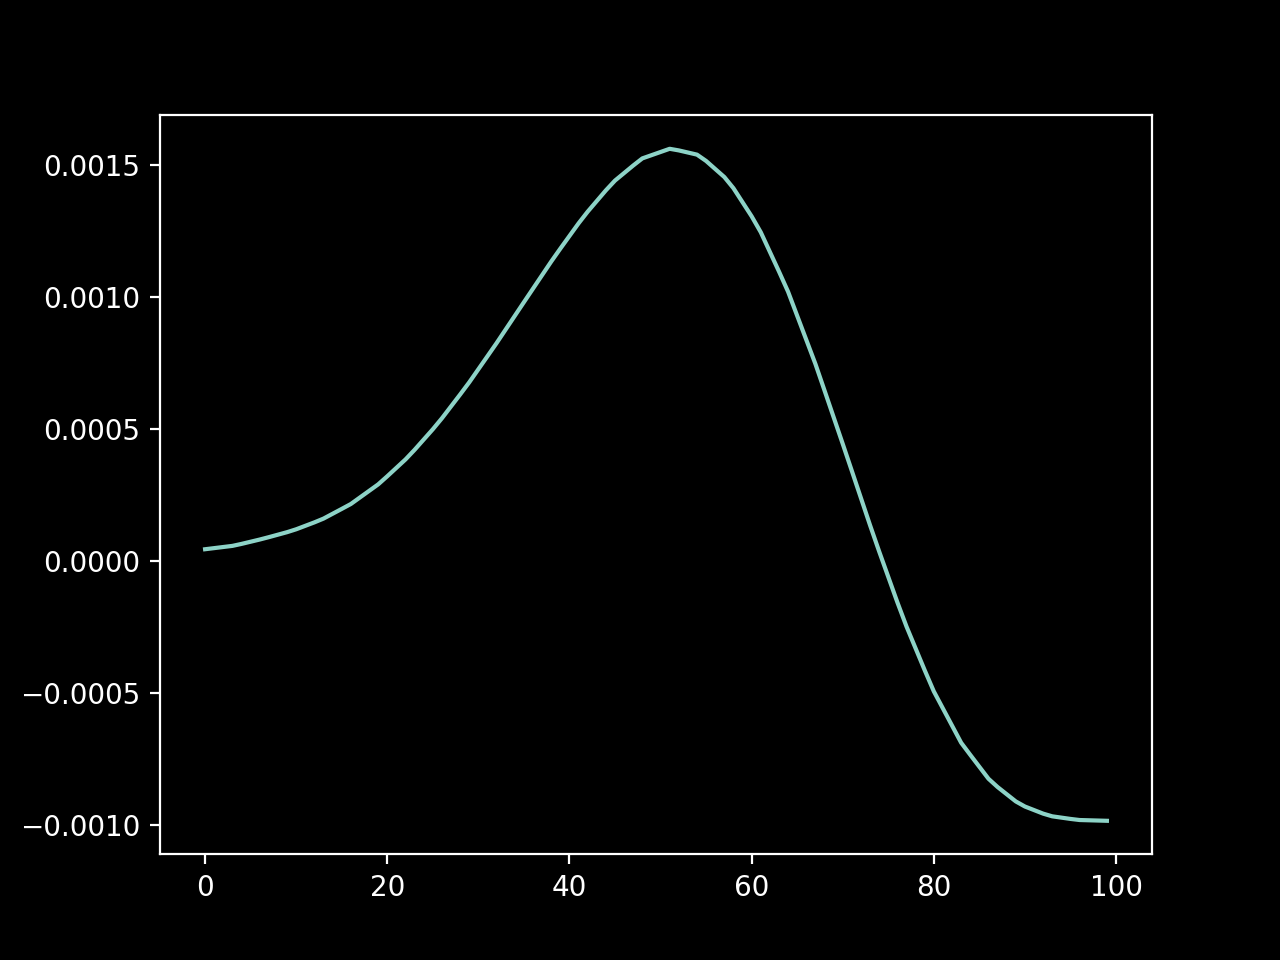

<IPython.core.display.Javascript object>


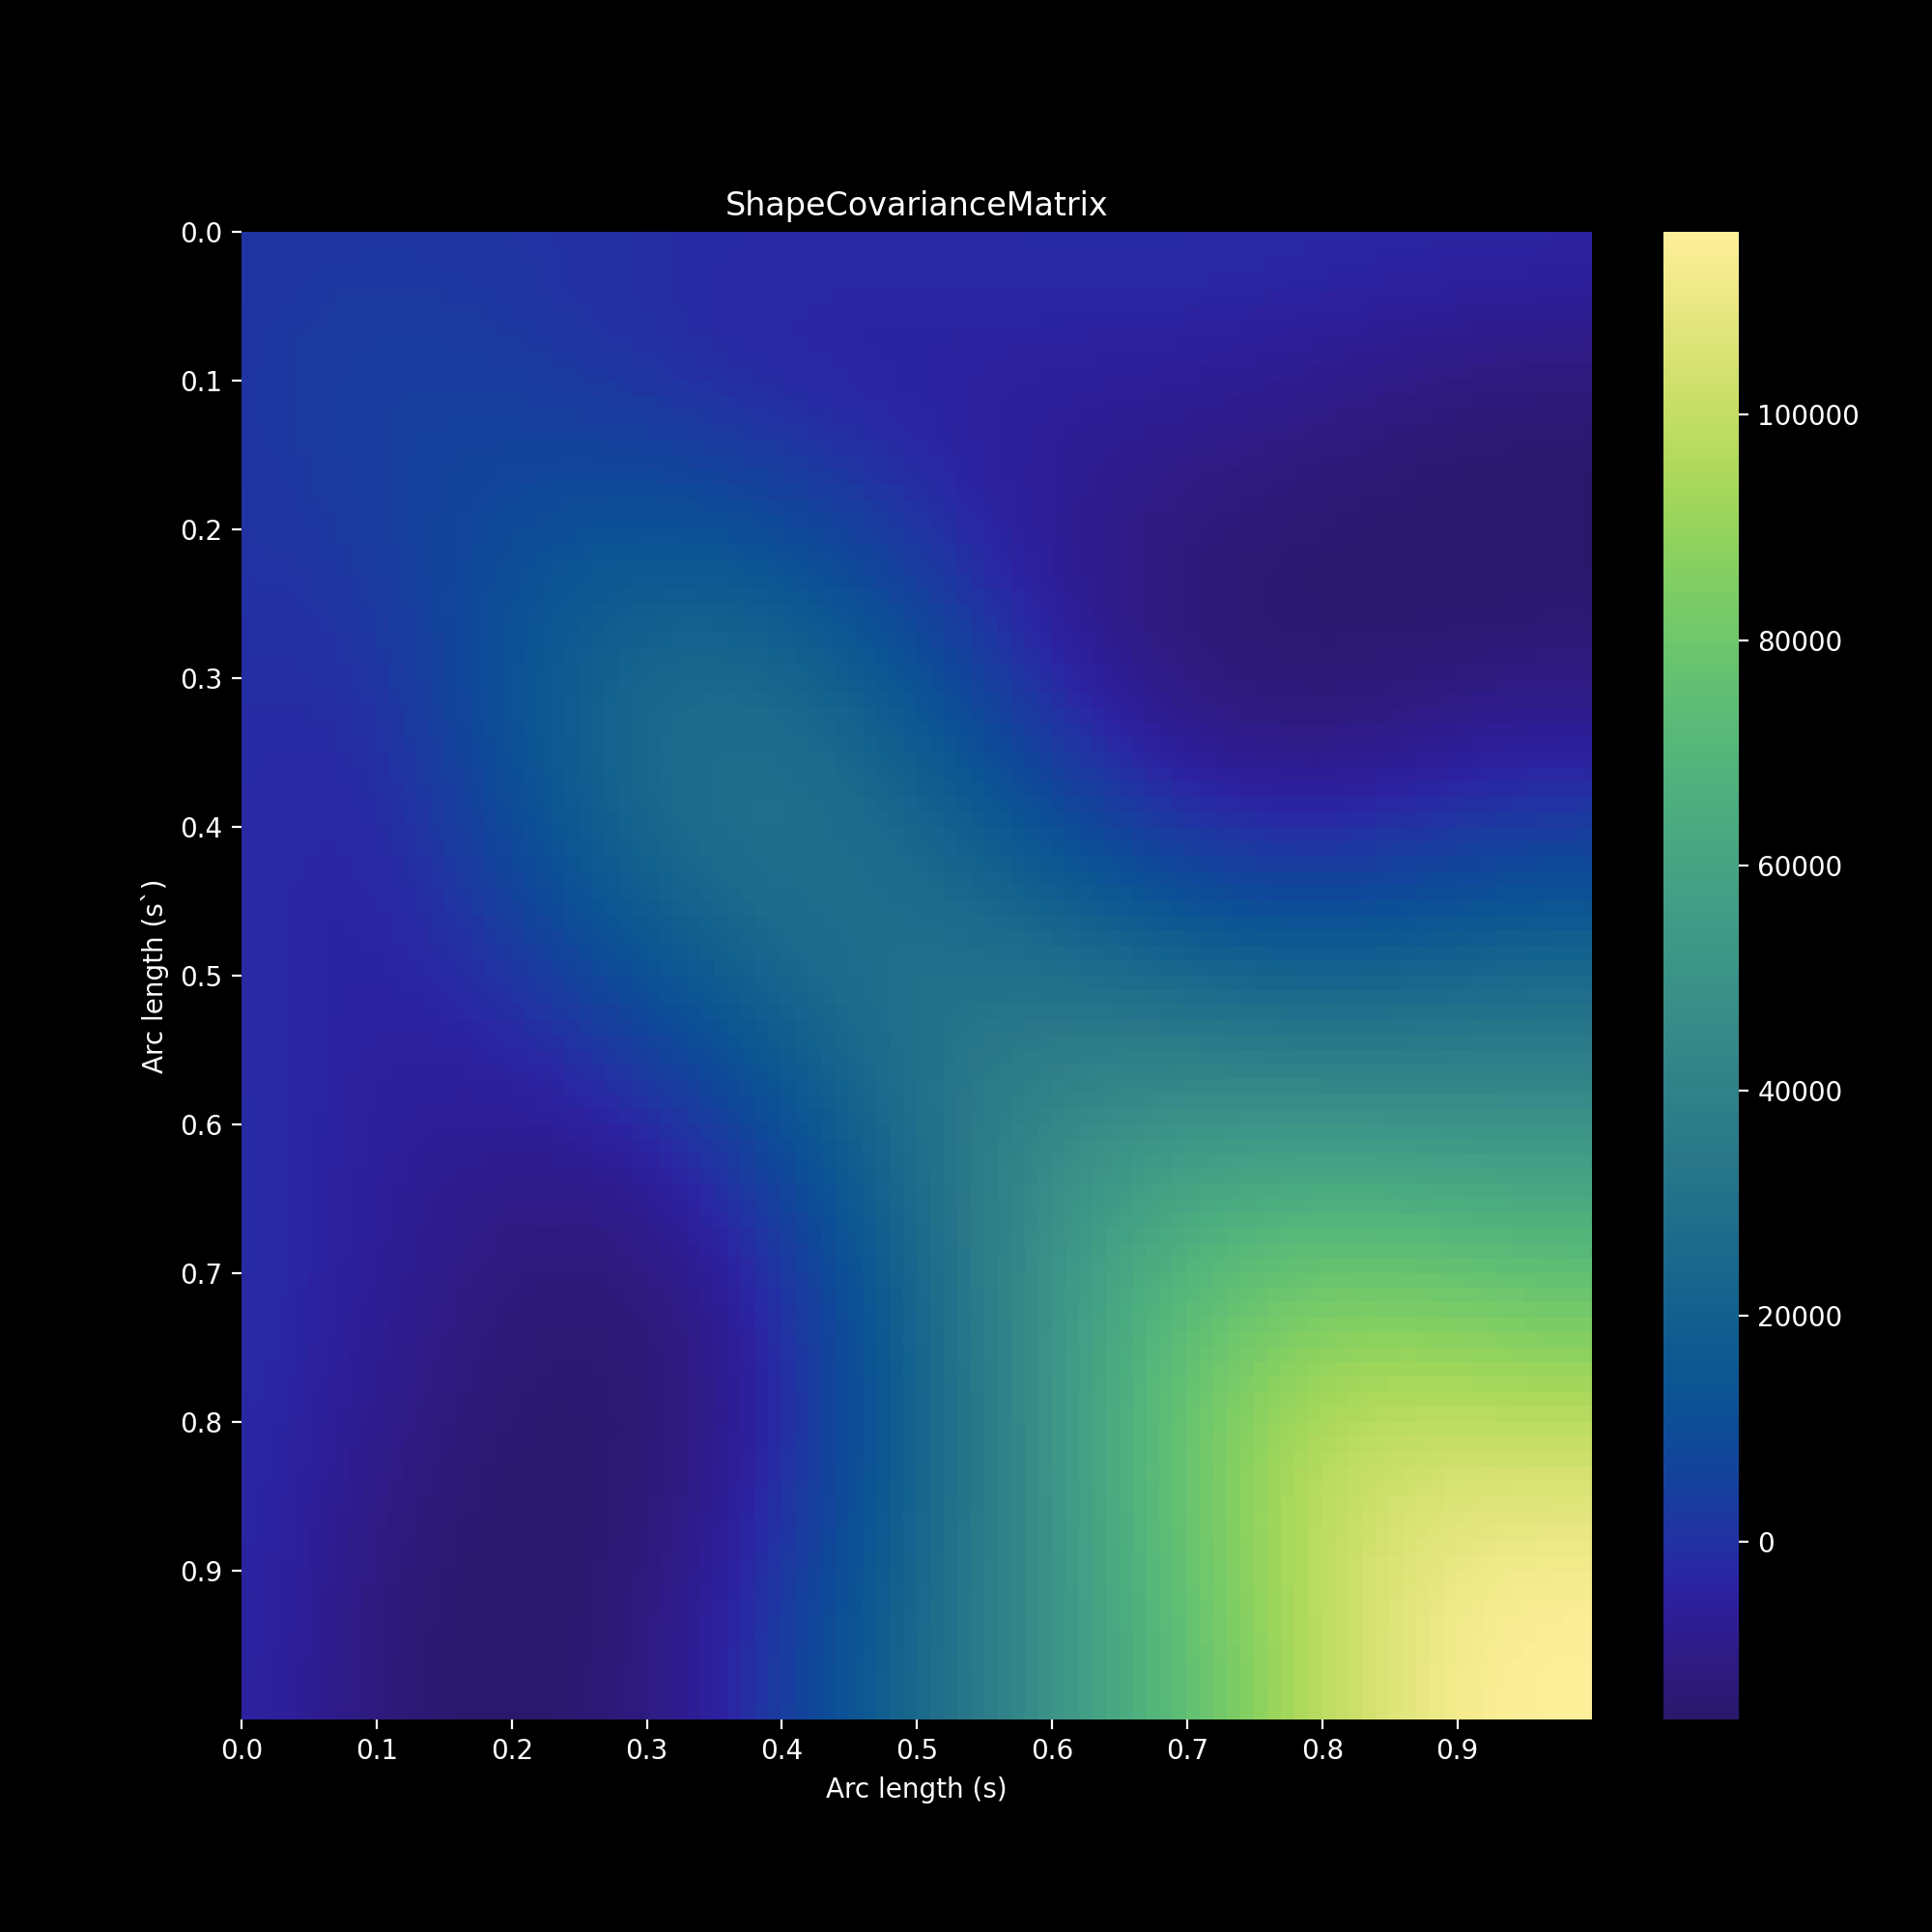

In [330]:
# Compute the shape covariance matrix
filament.compute_shape_covariance_matrix()

# Plot the mean tangent angle vector
plt.figure()
plt.plot(filament.phi_0)
plt.show()

filament.plot_shape_covariance_matrix(save = False)

# Eigen-decompisition of the covariance matrix

In [332]:
d, v = np.linalg.eigh(filament.covariance_matrix)


<IPython.core.display.Javascript object>


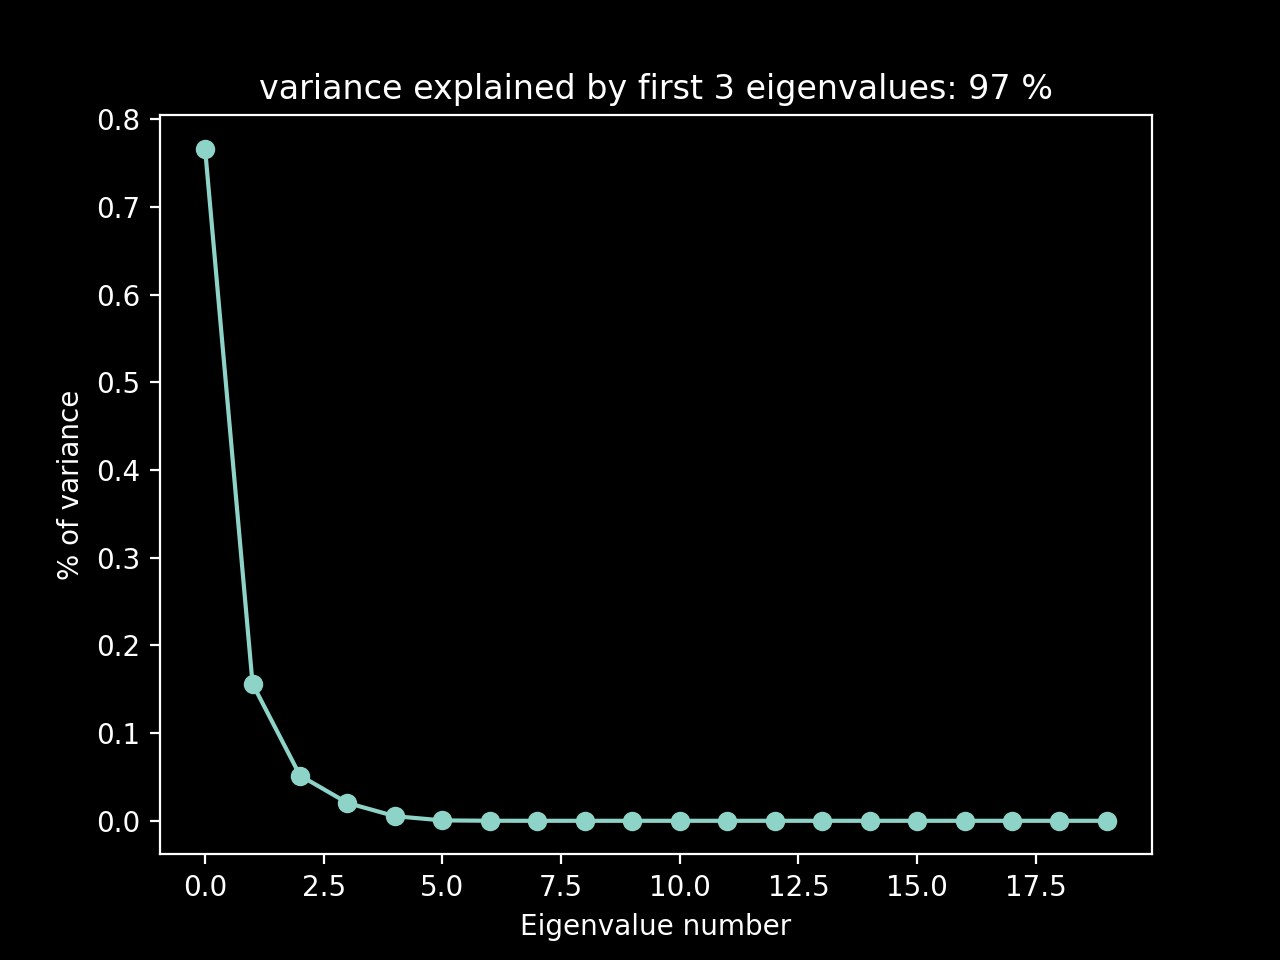

% of variance explained by first 3 eigenvalues: 97.38899241964181


In [333]:
# Plot the eigenvalue spectrum
idx_sorted = np.argsort(-np.real(d))
d_sorted = np.real(d[idx_sorted])

d_normalized = d_sorted/np.sum(d_sorted)


n_sig_eigenvalues = 3
plt.figure()
plt.plot(d_normalized[0:20], marker = 'o')
plt.xlabel('Eigenvalue number')
plt.ylabel('% of variance')
# plt.title('Eigenvalue spectrum')
plt.title('variance explained by first {} eigenvalues: {} %'.format(n_sig_eigenvalues, round(100*np.sum(d_normalized[0:n_sig_eigenvalues]))))
# plt.savefig(os.path.join(file_path, 'EigvalueSpectrum.png'), dpi = 300)
plt.show()

print('% of variance explained by first {} eigenvalues: {}'.format(n_sig_eigenvalues, 100*np.sum(d_normalized[0:n_sig_eigenvalues])))


In [334]:
# Eigenvectors corresponding to the sorted eigenvalues
eigenvectors_sorted = v[:, idx_sorted]

eigenvectors_sig = eigenvectors_sorted[:,0:n_sig_eigenvalues]

print(eigenvectors_sorted)

[[-0.00540588  0.01045893  0.01521133 ...  0.          0.63347642
   0.        ]
 [-0.00618696  0.0109967   0.01647632 ...  0.00420115 -0.61674465
   0.23432819]
 [-0.00696804  0.01153446  0.01774131 ...  0.03288405 -0.25628153
  -0.29151504]
 ...
 [ 0.17263913  0.02412073 -0.17533285 ... -0.34742632 -0.03203796
   0.09476504]
 [ 0.17266073  0.02383979 -0.17662367 ...  0.21159188 -0.00469315
   0.12431287]
 [ 0.17268233  0.02355884 -0.1779145  ...  0.06436176  0.04598683
  -0.04755457]]


<IPython.core.display.Javascript object>


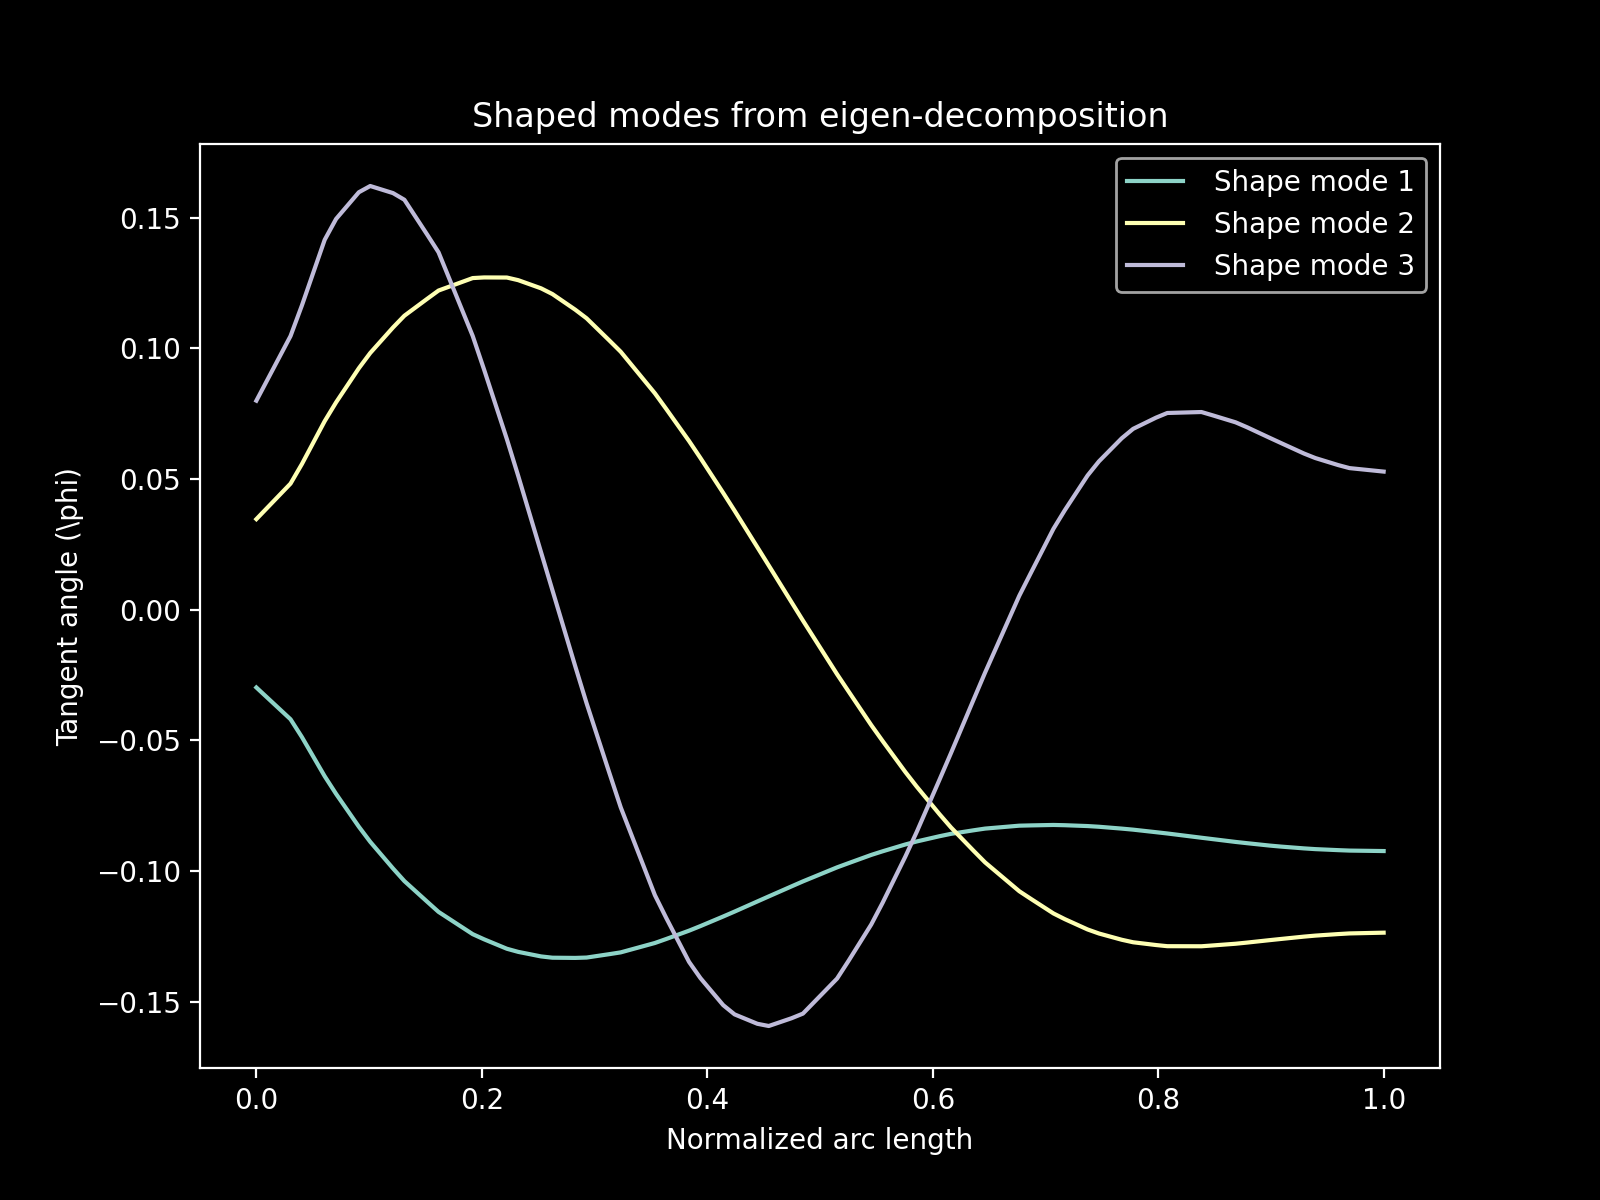

In [320]:
# Shapes corresponding to the eigenvectors
plt.figure(figsize = (8,6))
length_array = np.linspace(0, 1, len(eigenvectors_sig[:,0]))
for ii in range(n_sig_eigenvalues):
    
    plt.plot(length_array, eigenvectors_sorted[:, ii], label =' Shape mode {}'.format(ii+1))
    
plt.xlabel('Normalized arc length')
plt.ylabel('Tangent angle (\phi)')
plt.title('Shaped modes from eigen-decomposition')
plt.legend()
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'_ShapedModes.png'), dpi = 300)
plt.show()

# Projection of general filament shape onto the shape modes


In [335]:
from tqdm import tqdm
import pandas as pd

n_times, n_points = np.shape(filament.tangent_angles_matrix)
mode_amplitudes = np.zeros((n_times, n_sig_eigenvalues))
print(n_times, n_points)

matrix_A = eigenvectors_sig # n_points x n_eigvalues
matrix_A_inv = np.linalg.pinv(matrix_A)

for ii in tqdm(range(n_times)):

    rhs = filament.variance_matrix[ii, :]
    
    
    amplitudes_lst_sq = np.matmul(matrix_A_inv, rhs) # 
    
    for jj in range(n_sig_eigenvalues):
        mode_amplitudes[ii, jj] = amplitudes_lst_sq[jj]
      


 25%|██▌       | 25355/100001 [00:00<00:00, 253533.92it/s]

100001 100


100%|██████████| 100001/100001 [00:00<00:00, 380113.04it/s]


In [336]:
# Save the mode amplitude time-series
df_dict = {}
df_dict['Time'] = filament.Time

for ii in range(n_sig_eigenvalues):
    
    df_dict['Mode {} amplitude'.format(ii+1)] = mode_amplitudes[:,ii]
    
df_mode_amplitudes = pd.DataFrame(df_dict)
print(df_mode_amplitudes)

df_mode_amplitudes.to_csv(os.path.join(file_path, filament.dataName[:-5]+'_ModeAmplitudes.csv'))

             Time  Mode 1 amplitude  Mode 2 amplitude  Mode 3 amplitude
0             0.0          0.000621          0.007743         -0.004384
1            10.0          0.000643          0.007746         -0.004404
2            20.0          0.000649          0.007747         -0.004410
3            30.0          0.000655          0.007747         -0.004415
4            40.0          0.000659          0.007748         -0.004421
...           ...               ...               ...               ...
99996    999960.0         -0.632037         -0.811661         -0.101119
99997    999970.0         -0.608434         -0.797176         -0.099249
99998    999980.0         -0.585363         -0.783089         -0.097418
99999    999990.0         -0.562817         -0.769385         -0.095626
100000  1000000.0         -0.540787         -0.756053         -0.093875

[100001 rows x 4 columns]


<IPython.core.display.Javascript object>


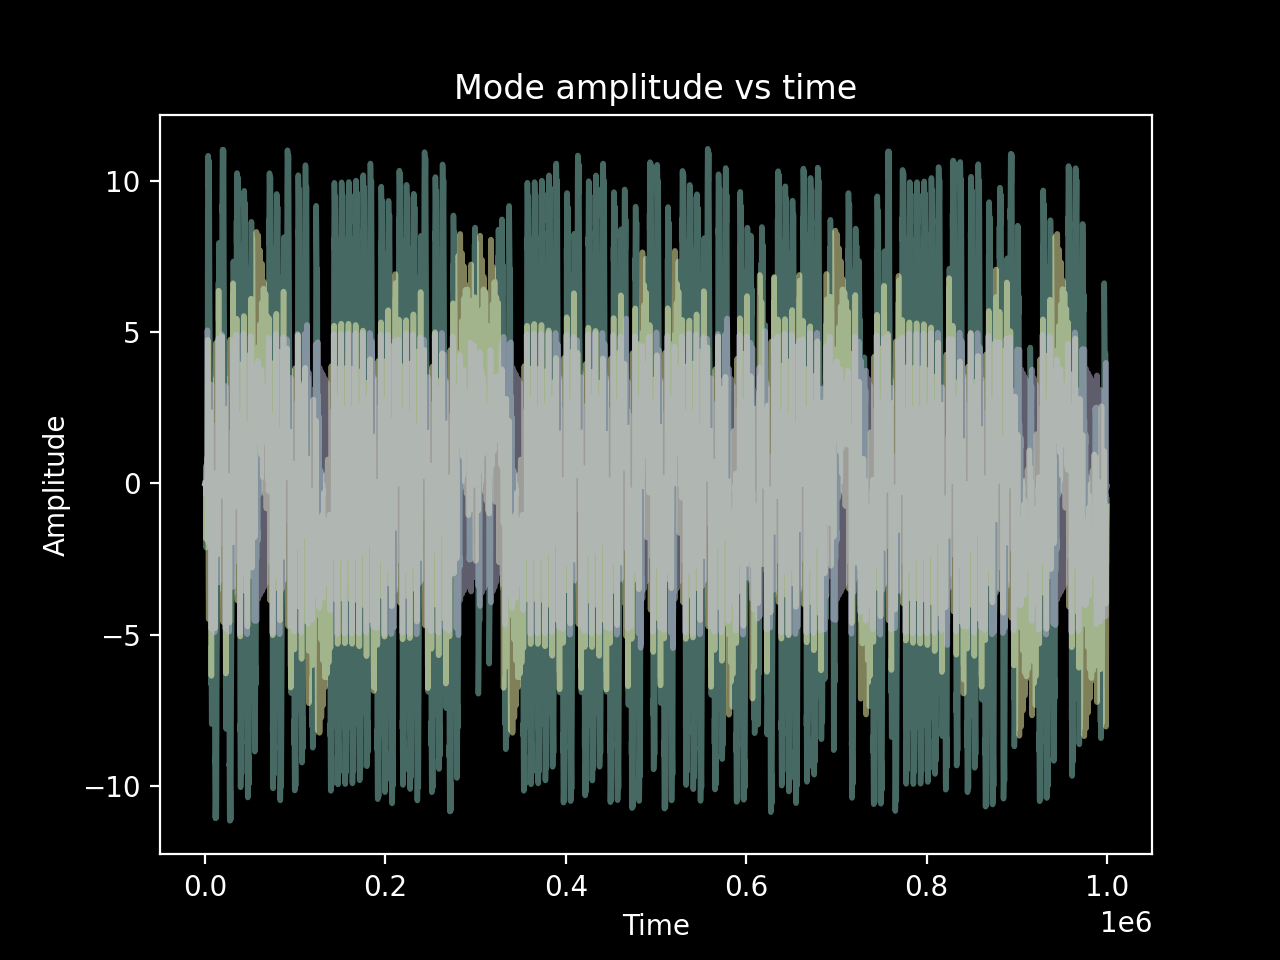

In [337]:
# Plot the dynamics of the mode amplitudes over time

plt.figure()

for ii in range(n_sig_eigenvalues):
    plt.plot(filament.Time, mode_amplitudes[:,ii],linewidth = 2, label = 'Mode {} amplitude'.format(ii+1), alpha = 0.5)
    
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Mode amplitude vs time')
plt.show()

    


<IPython.core.display.Javascript object>


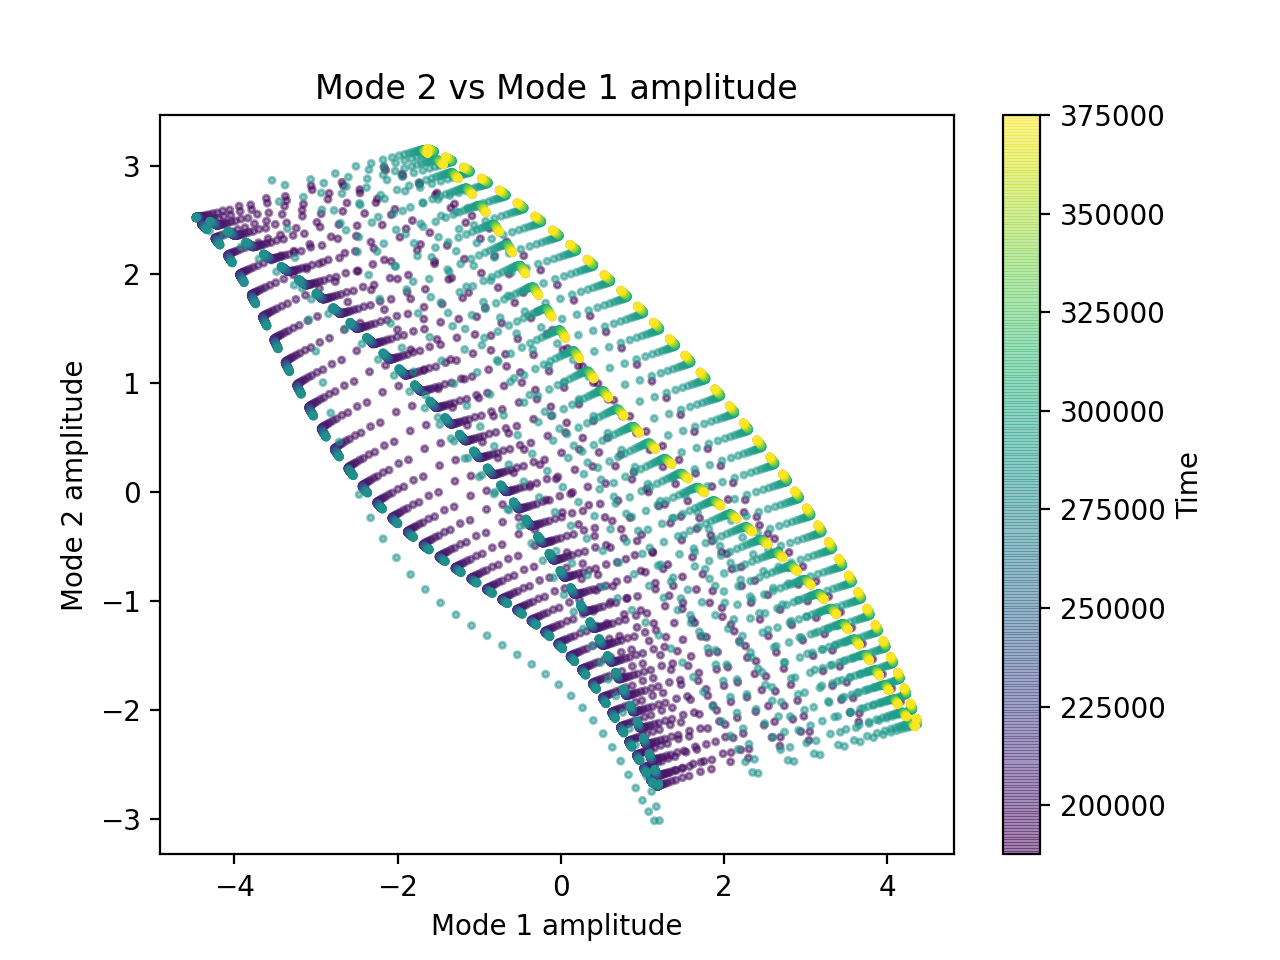

<IPython.core.display.Javascript object>


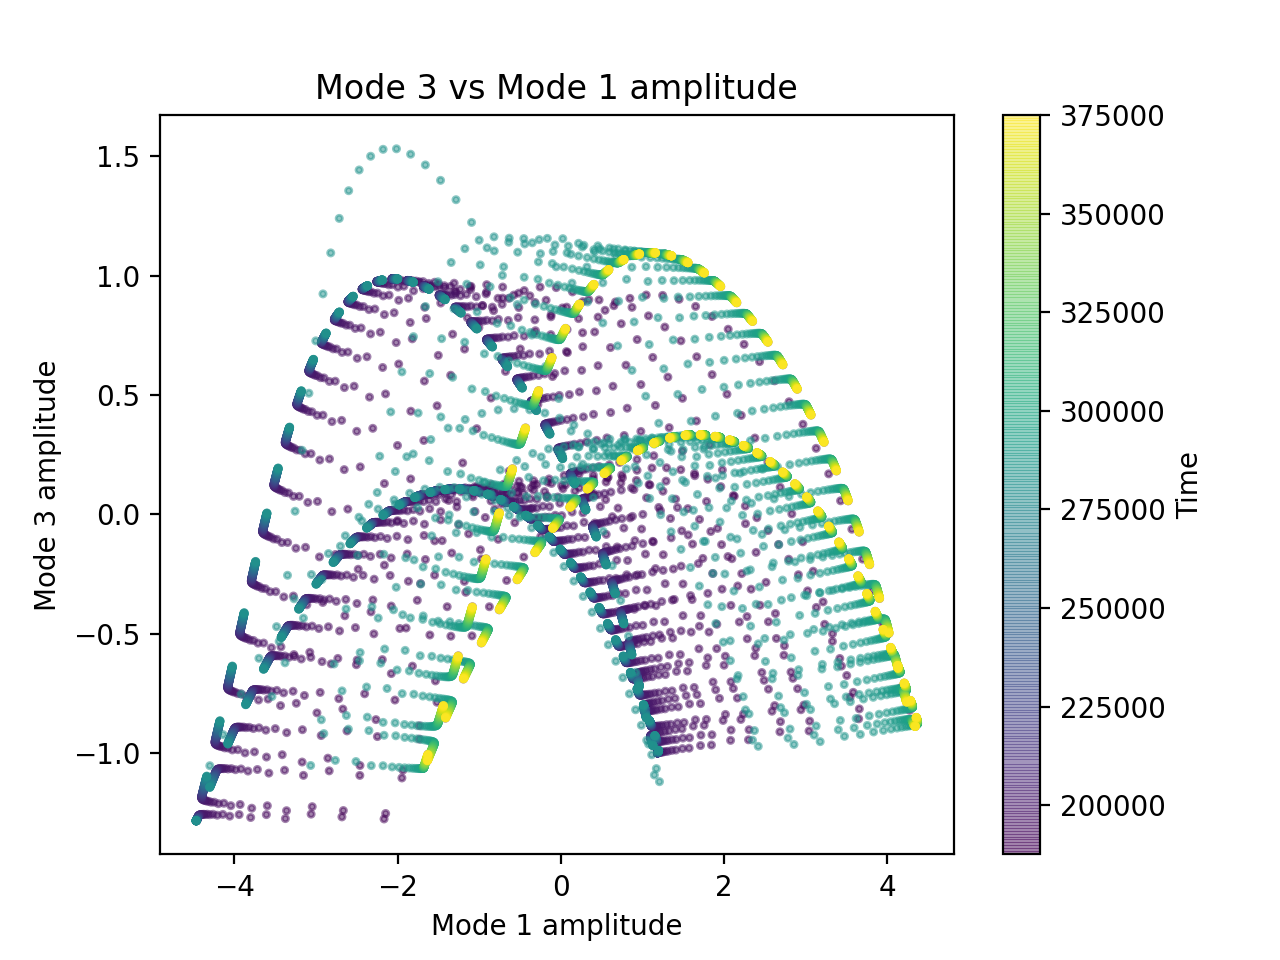

<IPython.core.display.Javascript object>


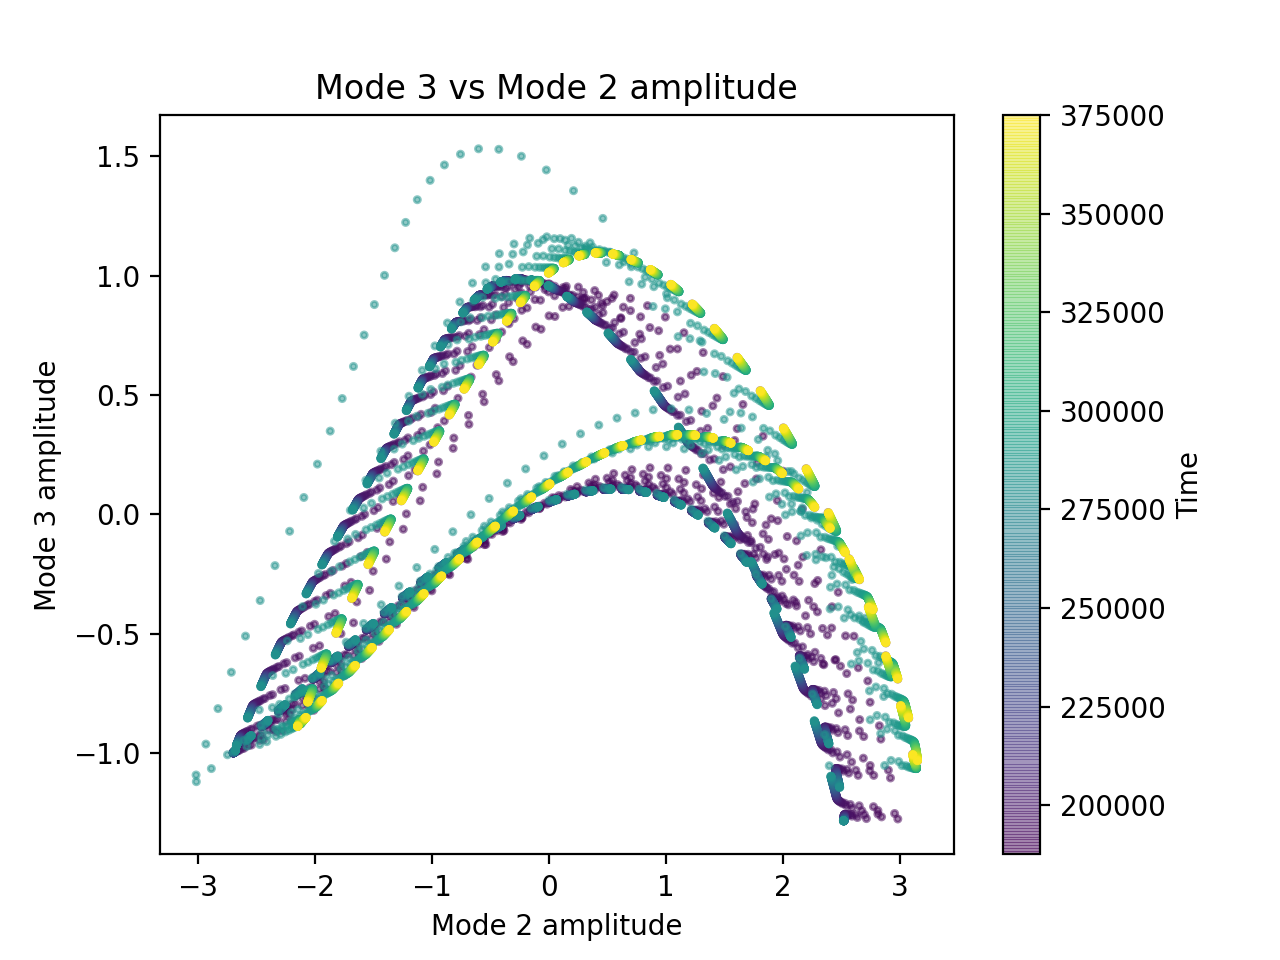

<IPython.core.display.Javascript object>


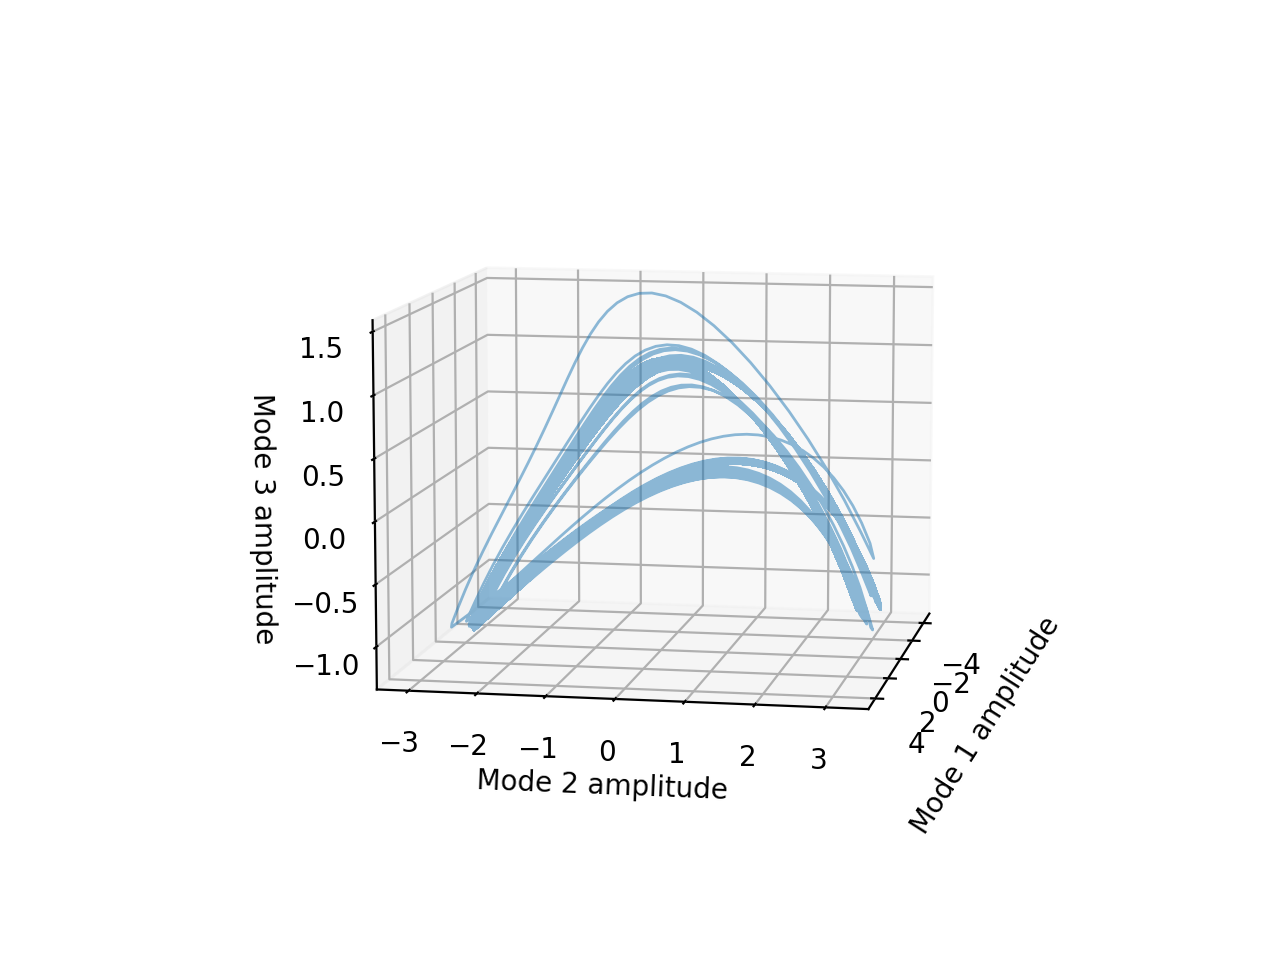

In [323]:
# Scatter-plots to visualize the phase dynamics
plt.style.use('default')

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,1], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 1 amplitude')
plt.ylabel('Mode 2 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 2 vs Mode 1 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode2vsMode1.png'), dpi = 300)

plt.show()

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,2], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 1 amplitude')
plt.ylabel('Mode 3 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 3 vs Mode 1 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode1.png'), dpi = 300)
plt.show()

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,1], mode_amplitudes[int(filament.Nt/2):,2], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 2 amplitude')
plt.ylabel('Mode 3 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 3 vs Mode 2 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode2.png'), dpi = 300)
plt.show()

# plt.style.use('dark_background')
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,1], mode_amplitudes[int(filament.Nt/2):,2], linewidth = 1, alpha = 0.5)
ax.set_xlabel('Mode 1 amplitude')
ax.set_ylabel('Mode 2 amplitude')
ax.set_zlabel('Mode 3 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode2vsMode1.png'), dpi = 300)

plt.show()